## Data Science Africa, Accra 2019

## IOT Data Cleaning and Visualisation (Air Quality Data)

### Import required packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates

import datetime as dt

### Reading in data obtained from IOT Platform
  - download the sample air quality data csv file from the session website (session 4). (https://airqo.net/dsa/)


In [32]:
airquality_data = pd.read_csv('AQ_22.csv', parse_dates = ['created_at'])

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning: tzname EAT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


### Data Inspection

In [33]:
airquality_data.head()

created_at  entry_id  field1  field2  field3  field4  field5  \
0 2019-03-02 19:36:14         1   65.68   73.15   73.38   79.50     0.0   
1 2019-03-02 19:37:33         2   59.03   71.70   61.15   72.50  1000.0   
2 2019-03-02 19:38:50         3   52.92   67.60   54.32   68.10  1000.0   
3 2019-03-02 19:40:07         4   58.28   72.50   55.58   69.08  1000.0   
4 2019-03-02 19:41:32         5   53.58   66.88   54.27   68.33  1000.0   

   field6  field7                                             field8  \
0     0.0    3.98  0.000000,0.000000,  0.00,0.00,0.00,0.00,29.00,...   
1  1000.0    3.93  1000.000000,1000.000000,1000000.00,-1.00,255.0...   
2  1000.0    3.90  1000.000000,1000.000000,1000000.00,-1.00,255.0...   
3  1000.0    3.96  1000.000000,1000.000000,1000000.00,-1.00,255.0...   
4  1000.0    3.96  1000.000000,1000.000000,1000000.00,-1.00,255.0...   

   latitude  longitude  elevation  status  
0       NaN        NaN        NaN     NaN  
1       NaN        NaN        NaN     NaN  
2       NaN        NaN        NaN     NaN  
3       NaN        NaN        NaN     NaN  
4       NaN        NaN        NaN     NaN

In [34]:
airquality_data.tail()

created_at  entry_id  field1  field2  field3  field4    field5  \
53260 2019-09-02 17:47:15     53261   39.90   48.30   41.42   48.73  0.567863   
53261 2019-09-02 17:48:25     53262   40.00   48.53   41.55   49.10  0.567868   
53262 2019-09-02 17:49:47     53263   41.03   49.20   40.95   49.10  0.567836   
53263 2019-09-02 17:51:08     53264   36.32   42.70   41.72   50.63  0.567835   
53264 2019-09-02 17:52:38     53265   39.97   48.27   42.17   51.28  0.567845   

          field6  field7                                             field8  \
53260  33.751438    3.65  0.567863,33.751438,1121.20,0.05,10.00,83.00,33...   
53261  33.751438    3.64  0.567868,33.751438,1121.80,0.06,10.00,84.00,32...   
53262  33.751415    3.63  0.567836,33.751415,1122.90,0.11,12.00,78.00,32...   
53263  33.751492    3.63  0.567835,33.751492,1137.30,0.09,12.00,78.00,31...   
53264  33.751503    3.62  0.567845,33.751503,1137.60,0.05,12.00,76.00,31...   

       latitude  longitude  elevation  status  
53260       NaN        NaN        NaN     NaN  
53261       NaN        NaN        NaN     NaN  
53262       NaN        NaN        NaN     NaN  
53263       NaN        NaN        NaN     NaN  
53264       NaN        NaN        NaN     NaN

In [35]:
print('shape of the data')
print(airquality_data.shape)

print('number of rows in the dataset') 
print(airquality_data.shape[0])

shape of the data
(53265, 14)
number of rows in the dataset
53265


In [36]:
print(list(airquality_data.columns.values))

['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7', 'field8', 'latitude', 'longitude', 'elevation', 'status']


In [37]:
airquality_data.dtypes

created_at    datetime64[ns]
entry_id               int64
field1               float64
field2               float64
field3               float64
field4               float64
field5               float64
field6               float64
field7               float64
field8                object
latitude             float64
longitude            float64
elevation            float64
status               float64
dtype: object

In [38]:
airquality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53265 entries, 0 to 53264
Data columns (total 14 columns):
created_at    53265 non-null datetime64[ns]
entry_id      53265 non-null int64
field1        53265 non-null float64
field2        53265 non-null float64
field3        53265 non-null float64
field4        53265 non-null float64
field5        53265 non-null float64
field6        53265 non-null float64
field7        53265 non-null float64
field8        53265 non-null object
latitude      0 non-null float64
longitude     0 non-null float64
elevation     0 non-null float64
status        0 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 5.7+ MB


### Rename column names 

In [39]:
airquality_data.rename(columns={'created_at':'TimeStamp','field1':'s1_pm2_5','field2':'s1_pm10',
                                     'field3':'s2_pm2_5', 'field4':'s2_pm10',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 'field8':'GpsData'},inplace=True)
airquality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53265 entries, 0 to 53264
Data columns (total 14 columns):
TimeStamp          53265 non-null datetime64[ns]
entry_id           53265 non-null int64
s1_pm2_5           53265 non-null float64
s1_pm10            53265 non-null float64
s2_pm2_5           53265 non-null float64
s2_pm10            53265 non-null float64
Latitude           53265 non-null float64
Longitude          53265 non-null float64
Battery Voltage    53265 non-null float64
GpsData            53265 non-null object
latitude           0 non-null float64
longitude          0 non-null float64
elevation          0 non-null float64
status             0 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 5.7+ MB


In [40]:
#Changing the datatype of column from object to float
airquality_data['s2_pm2_5'] = pd.to_numeric(airquality_data['s2_pm2_5'], errors='coerce')
airquality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53265 entries, 0 to 53264
Data columns (total 14 columns):
TimeStamp          53265 non-null datetime64[ns]
entry_id           53265 non-null int64
s1_pm2_5           53265 non-null float64
s1_pm10            53265 non-null float64
s2_pm2_5           53265 non-null float64
s2_pm10            53265 non-null float64
Latitude           53265 non-null float64
Longitude          53265 non-null float64
Battery Voltage    53265 non-null float64
GpsData            53265 non-null object
latitude           0 non-null float64
longitude          0 non-null float64
elevation          0 non-null float64
status             0 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 5.7+ MB


### Drop the columns that we won't be using

In [41]:
airquality_data_of_interest = airquality_data.drop(['entry_id','Battery Voltage','latitude','longitude','elevation',
                                                    'status','GpsData',], axis=1)
airquality_data_of_interest.head()

TimeStamp  s1_pm2_5  s1_pm10  s2_pm2_5  s2_pm10  Latitude  \
0 2019-03-02 19:36:14     65.68    73.15     73.38    79.50       0.0   
1 2019-03-02 19:37:33     59.03    71.70     61.15    72.50    1000.0   
2 2019-03-02 19:38:50     52.92    67.60     54.32    68.10    1000.0   
3 2019-03-02 19:40:07     58.28    72.50     55.58    69.08    1000.0   
4 2019-03-02 19:41:32     53.58    66.88     54.27    68.33    1000.0   

   Longitude  
0        0.0  
1     1000.0  
2     1000.0  
3     1000.0  
4     1000.0

### Show the data summary

In [42]:
airquality_data_of_interest.describe()

s1_pm2_5       s1_pm10      s2_pm2_5      s2_pm10      Latitude  \
count  53265.00000  53265.000000  53265.000000  53265.00000  53265.000000   
mean      36.20141     41.931268     37.485349     42.74907      1.918687   
std       19.31016     22.331279     20.398348     23.19752     36.720539   
min        0.03000      0.030000      0.050000      0.05000      0.000000   
25%       23.62000     25.330000     24.320000     25.48000      0.567848   
50%       33.92000     39.570000     35.020000     40.42000      0.567871   
75%       44.37000     54.430000     45.800000     55.72000      0.567891   
max      388.97000    429.530000    390.330000    432.80000   1000.000000   

          Longitude  
count  53265.000000  
mean      35.040558  
std       35.510073  
min        0.000000  
25%       33.751431  
50%       33.751457  
75%       33.751472  
max     1000.000000

### Converting the timezone to EAT

In [43]:
airquality_data_of_interest['TimeStamp'] = airquality_data_of_interest['TimeStamp'].dt.tz_localize('Africa/Kampala')
airquality_data_of_interest = airquality_data_of_interest.drop_duplicates(subset='TimeStamp', keep='first') 
time_indexed_data = airquality_data_of_interest.set_index('TimeStamp')
time_indexed_data.head()

s1_pm2_5  s1_pm10  s2_pm2_5  s2_pm10  Latitude  \
TimeStamp                                                                   
2019-03-02 19:36:14+03:00     65.68    73.15     73.38    79.50       0.0   
2019-03-02 19:37:33+03:00     59.03    71.70     61.15    72.50    1000.0   
2019-03-02 19:38:50+03:00     52.92    67.60     54.32    68.10    1000.0   
2019-03-02 19:40:07+03:00     58.28    72.50     55.58    69.08    1000.0   
2019-03-02 19:41:32+03:00     53.58    66.88     54.27    68.33    1000.0   

                           Longitude  
TimeStamp                             
2019-03-02 19:36:14+03:00        0.0  
2019-03-02 19:37:33+03:00     1000.0  
2019-03-02 19:38:50+03:00     1000.0  
2019-03-02 19:40:07+03:00     1000.0  
2019-03-02 19:41:32+03:00     1000.0

### Deal with outliers

In [44]:
bad_lats = len((time_indexed_data[time_indexed_data['Latitude'] == 1000])& 
               (time_indexed_data[time_indexed_data['Latitude'] == 0]))
bad_longs = len((time_indexed_data[time_indexed_data['Longitude'] == 1000])& 
               (time_indexed_data[time_indexed_data['Longitude'] == 0]))
print ('Bad latitudes:',bad_lats)
print ('Bad longitudes:',bad_longs)

Bad latitudes: 99
Bad longitudes: 99


In [45]:
#Replacing latitude and longitude values of 0 and 1000 with Null
time_indexed_data['Latitude'] = time_indexed_data['Latitude'].replace([0,1000], np.nan)
time_indexed_data['Longitude'] =time_indexed_data['Longitude'].replace([0,1000], np.nan)
time_indexed_data.head(5)

s1_pm2_5  s1_pm10  s2_pm2_5  s2_pm10  Latitude  \
TimeStamp                                                                   
2019-03-02 19:36:14+03:00     65.68    73.15     73.38    79.50       NaN   
2019-03-02 19:37:33+03:00     59.03    71.70     61.15    72.50       NaN   
2019-03-02 19:38:50+03:00     52.92    67.60     54.32    68.10       NaN   
2019-03-02 19:40:07+03:00     58.28    72.50     55.58    69.08       NaN   
2019-03-02 19:41:32+03:00     53.58    66.88     54.27    68.33       NaN   

                           Longitude  
TimeStamp                             
2019-03-02 19:36:14+03:00        NaN  
2019-03-02 19:37:33+03:00        NaN  
2019-03-02 19:38:50+03:00        NaN  
2019-03-02 19:40:07+03:00        NaN  
2019-03-02 19:41:32+03:00        NaN

### Show null values in each column

In [46]:
time_indexed_data.isnull().sum()

s1_pm2_5      0
s1_pm10       0
s2_pm2_5      0
s2_pm10       0
Latitude     99
Longitude    99
dtype: int64

In [47]:
time_indexed_data['Latitude'] = time_indexed_data['Latitude'].fillna(method = 'bfill')
time_indexed_data['Longitude'] = time_indexed_data['Longitude'].fillna(method = 'bfill')
time_indexed_data.isnull().sum()

s1_pm2_5     0
s1_pm10      0
s2_pm2_5     0
s2_pm10      0
Latitude     0
Longitude    0
dtype: int64

In [48]:
#Replacing values outside acceptable range with the other sensor's data

time_indexed_data['s1_pm2_5'] = np.where(((time_indexed_data['s1_pm2_5']<=0) | (time_indexed_data['s1_pm2_5'] >500.4)),
                                       time_indexed_data['s2_pm2_5'], time_indexed_data['s1_pm2_5'])

time_indexed_data['s2_pm2_5'] = np.where(((time_indexed_data['s2_pm2_5']<=0) | (time_indexed_data['s2_pm2_5'] >500.4)),
                                       time_indexed_data['s1_pm2_5'], time_indexed_data['s2_pm2_5'])
        

In [49]:
#Dropping pm2.5 greater than 500.4 or less than or equal to 0 for both sensors
outlier_indices = time_indexed_data[((time_indexed_data['s1_pm2_5'] > 500.4) & (time_indexed_data['s2_pm2_5'] > 500.4)) |
                                    ((time_indexed_data['s1_pm2_5'] <= 0) & (time_indexed_data['s2_pm2_5'] <=0))].index
print(len(outlier_indices))
time_indexed_data.drop(outlier_indices, inplace = True)
time_indexed_data.info()

0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53265 entries, 2019-03-02 19:36:14+03:00 to 2019-09-02 17:52:38+03:00
Data columns (total 6 columns):
s1_pm2_5     53265 non-null float64
s1_pm10      53265 non-null float64
s2_pm2_5     53265 non-null float64
s2_pm10      53265 non-null float64
Latitude     53265 non-null float64
Longitude    53265 non-null float64
dtypes: float64(6)
memory usage: 2.8 MB


In [50]:
time_indexed_data.head()

s1_pm2_5  s1_pm10  s2_pm2_5  s2_pm10  Latitude  \
TimeStamp                                                                   
2019-03-02 19:36:14+03:00     65.68    73.15     73.38    79.50  0.649999   
2019-03-02 19:37:33+03:00     59.03    71.70     61.15    72.50  0.649999   
2019-03-02 19:38:50+03:00     52.92    67.60     54.32    68.10  0.649999   
2019-03-02 19:40:07+03:00     58.28    72.50     55.58    69.08  0.649999   
2019-03-02 19:41:32+03:00     53.58    66.88     54.27    68.33  0.649999   

                           Longitude  
TimeStamp                             
2019-03-02 19:36:14+03:00  33.171635  
2019-03-02 19:37:33+03:00  33.171635  
2019-03-02 19:38:50+03:00  33.171635  
2019-03-02 19:40:07+03:00  33.171635  
2019-03-02 19:41:32+03:00  33.171635

In [51]:
## obtaining the averages of sensor one and sensor two readings
time_indexed_data['pm2_5'] =time_indexed_data[['s1_pm2_5', 's2_pm2_5']].mean(axis=1)
time_indexed_data['pm10'] =time_indexed_data[['s1_pm10', 's2_pm10']].mean(axis=1)

### Data Visualisation

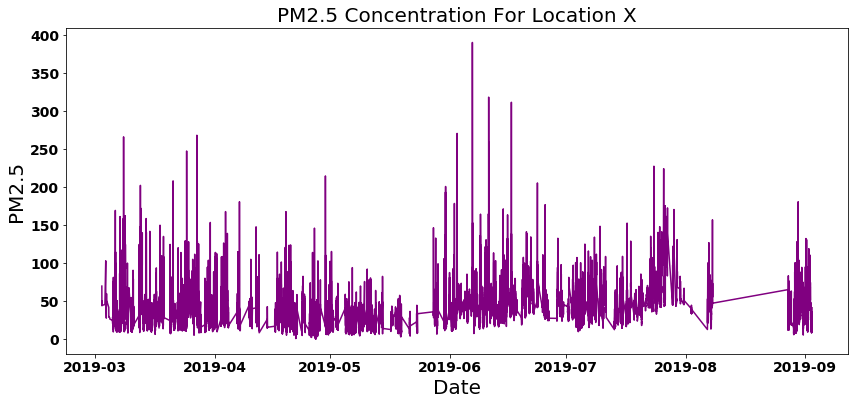

<Figure size 432x288 with 0 Axes>

In [52]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(time_indexed_data.index, 
             time_indexed_data['pm2_5'], color='purple', linestyle='solid') 
    
    chart_title =  'PM2.5 Concentration For Location X'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    #plt.legend()
    plt.show()
    plt.tight_layout()
    fig.savefig('pm25_concentration_for_location_x.png')

### Compute average, minimum and maximum hourly, daily, monthly concentration values
    - calculate the corresponding averages for hourly, daily and monthly observations

In [53]:
hourly_average_airquality_data_concentrations = time_indexed_data.resample('H').mean().round(2).dropna(axis=0) 
hourly_maximum_airquality_data_concentrations  = time_indexed_data.resample('H').max().round(2).dropna(axis=0)
hourly_minimum_airquality_data_concentrations  = time_indexed_data.resample('H').min().round(2).dropna(axis=0)

daily_average_airquality_data_concentrations  = time_indexed_data.resample('D').mean().round(2).dropna(axis=0)
daily_maximum_airquality_data_concentrations  = time_indexed_data.resample('D').max().round(2).dropna(axis=0)
daily_minimum_airquality_data_concentrations  = time_indexed_data.resample('D').min().round(2).dropna(axis=0)

monthly_average_airquality_data_concentrations  = time_indexed_data.resample('M').mean().round(2).dropna(axis=0)
monthly_maximum_airquality_data_concentrations  = time_indexed_data.resample('M').max().round(2).dropna(axis=0)
monthly_minimum_airquality_data_concentrations  = time_indexed_data.resample('M').min().round(2).dropna(axis=0)

hourly_average_airquality_data_concentrations.head()

s1_pm2_5  s1_pm10  s2_pm2_5  s2_pm10  Latitude  \
TimeStamp                                                                   
2019-03-02 19:00:00+03:00     51.41    64.57     52.81    65.47      0.65   
2019-03-02 20:00:00+03:00     47.10    59.35     47.85    59.30      0.65   
2019-03-03 14:00:00+03:00     45.18    55.87     45.37    56.55      0.65   
2019-03-03 19:00:00+03:00     83.28    96.11     86.76    98.03      1.05   
2019-03-03 21:00:00+03:00     38.84    47.65     40.48    50.25      1.05   

                           Longitude  pm2_5   pm10  
TimeStamp                                           
2019-03-02 19:00:00+03:00      33.17  52.11  65.02  
2019-03-02 20:00:00+03:00      33.17  47.47  59.32  
2019-03-03 14:00:00+03:00      33.17  45.28  56.21  
2019-03-03 19:00:00+03:00      34.18  85.02  97.07  
2019-03-03 21:00:00+03:00      34.18  39.66  48.95

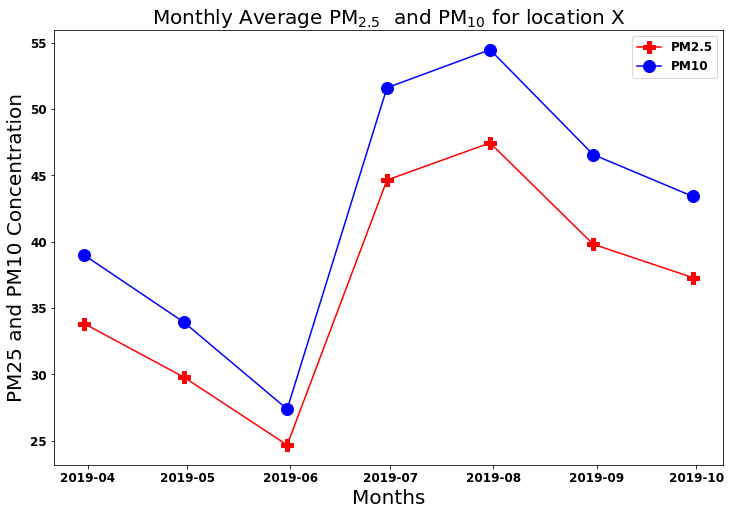

In [54]:
    plt.rcParams.update({'font.size':14, 'font.weight':'bold','mathtext.default':  'regular'})
    x_axis_label = 'Months'
    y_axis_label =  'PM25 and PM10 Concentration'
    chart_title  =  'Monthly Average $PM_{2.5}$  and $PM_{10}$ for location X'
    file_path_no_aqi_color   =  ('average_pm25_foreach_month_for_locations_x.png')
    
    
    fig = plt.figure(figsize=(12,8))
    plt.rcParams.update({'font.size':12, 'font.weight':'bold', 'mathtext.default':  'regular'})
    ax = fig.add_subplot(111)
  
    plt.plot(monthly_average_airquality_data_concentrations.index, 
             monthly_average_airquality_data_concentrations['pm2_5'].values, 
             color='red', marker='P', linestyle='solid',  label='PM2.5', linewidth=1.5,markersize=12)
    
    plt.plot(monthly_average_airquality_data_concentrations.index, 
             monthly_average_airquality_data_concentrations['pm10'].values, 
             color='blue', marker='o', linestyle='solid',  label='PM10', linewidth=1.5,markersize=12)
    
    
    plt.title(chart_title, fontsize=20)
    plt.ylabel(y_axis_label, fontsize=20)
    plt.xlabel(x_axis_label,fontsize=20)
    
    plt.legend(loc='upper right')
    plt.show()
    fig.savefig(file_path_no_aqi_color)

### Daily Summaries

In [55]:
print(daily_average_airquality_data_concentrations.shape) #shape of dataframe
print(daily_average_airquality_data_concentrations.max()) #max values in dataframe

(148, 8)
s1_pm2_5     116.33
s1_pm10      124.44
s2_pm2_5     121.81
s2_pm10      128.58
Latitude       1.05
Longitude     34.14
pm2_5        119.07
pm10         126.51
dtype: float64


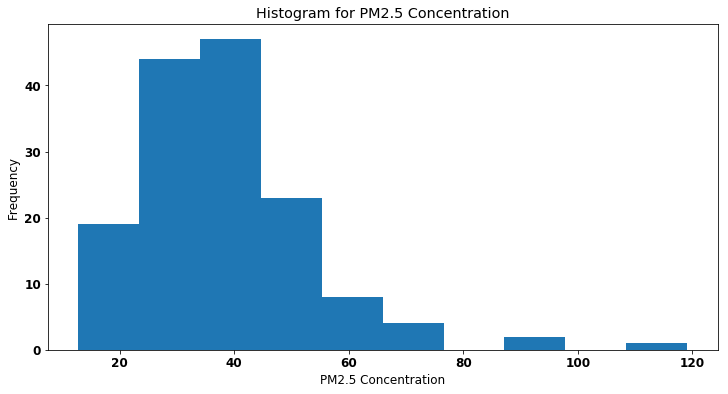

In [56]:
plt.rc('figure', figsize=(12,6))
plt.hist(daily_average_airquality_data_concentrations['pm2_5'], 10)
plt.ylabel('Frequency')
plt.xlabel('PM2.5 Concentration')
plt.title('Histogram for PM2.5 Concentration')
plt.show()

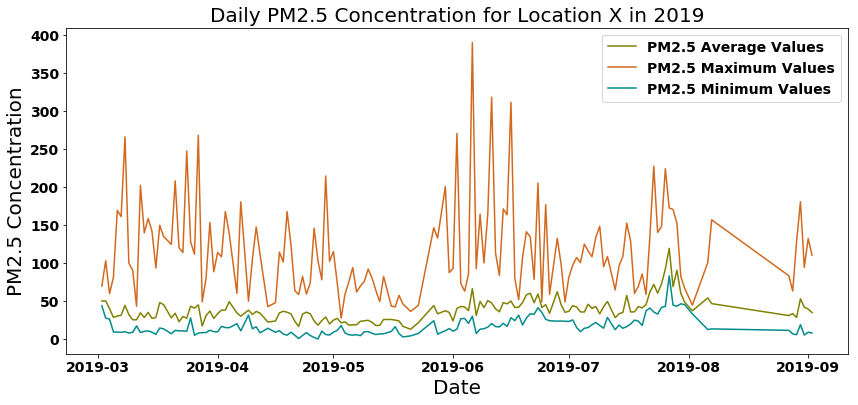

In [57]:
    fig = plt.figure(figsize=(14,6))
    
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    
    plt.plot(daily_average_airquality_data_concentrations.index, 
             daily_average_airquality_data_concentrations['pm2_5'], 
             color='olive',  linestyle='solid', label='PM2.5 Average Values')
    
    plt.plot(daily_maximum_airquality_data_concentrations.index, 
             daily_maximum_airquality_data_concentrations['pm2_5'], 
             color='chocolate',  linestyle='solid', label='PM2.5 Maximum Values')
    
    plt.plot(daily_minimum_airquality_data_concentrations.index, 
             daily_minimum_airquality_data_concentrations['pm2_5'], 
             color='darkcyan', linestyle='solid', label='PM2.5 Minimum Values')
    
    chart_title =  'Daily PM2.5 Concentration for Location X in 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig('daily_pm25_concentration_location_x_2019.png')

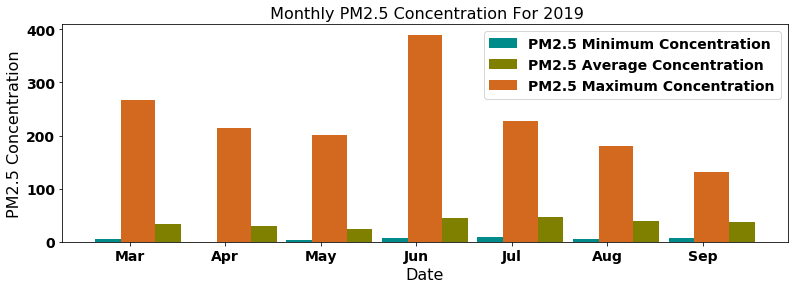

In [58]:
ind = np.arange(len(monthly_average_airquality_data_concentrations))
width = 0.36
#0.525
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind- width/2, monthly_minimum_airquality_data_concentrations['pm2_5'], width, color='darkcyan', label='PM2.5 Minimum Concentration')
rects3 = ax.bar(ind + width, monthly_average_airquality_data_concentrations['pm2_5'], width, color='olive', label='PM2.5 Average Concentration')
rects2 = ax.bar(ind+ width/4,  monthly_maximum_airquality_data_concentrations['pm2_5'], width, color='chocolate',label='PM2.5 Maximum Concentration')
 
ax.set_ylabel('PM2.5 Concentration',fontsize=16)
ax.set_title(' Monthly PM2.5 Concentration For 2019', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticks(ind)
x_tick_labels = pd.to_datetime(monthly_average_airquality_data_concentrations.index)
final_labels= []
for x in x_tick_labels:
    final_labels.append(x.strftime('%b'))
ax.set_xticklabels(final_labels, fontsize=14)
ax.legend()


plt.show()
fig.savefig( 'monthly_pm25_concentration_bargraph.png')
